<a href="https://colab.research.google.com/github/Series-Parallel/Linear_Regression_From_Scratch/blob/main/My_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Approach will be using OLS:

OLS stands for Ordinary Least Squares which is a linear regression method that employs a closed-form solution, calculating optimal coefficients to analytically minimize the sum of squared differences between predicted and actual values. This method involves finidng the best coefficients using linear algebra operation and is well-suited for smaller datasetsm where computational efficiency is less critical.

The prerequisites for Ordinary Least Squares (OLS) include an approximately linear relationship, observations are independent, a normal distribution of residuals, no perfect multicollinearity among independent variables, and no correlation between independent variables and residuals. Meeting these assumptions ensures the reliability of OLS estimate.

(Source of the below image is medium!)

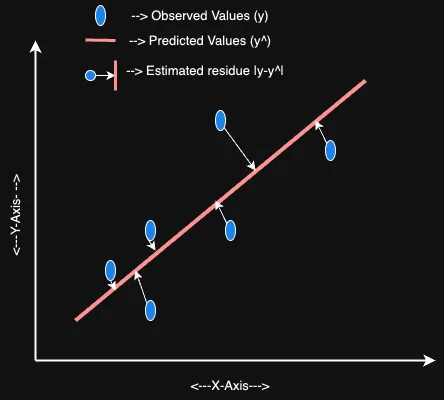

In [1]:
# Write a function to calculate RMSE (Root Mean Square Error)

from math import sqrt
import numpy as np

def rmse_metric(actual, predicted):
    sum_error=0.0
    for y, y_hat in zip(actual, predicted):
      prediction_error=y_hat-y
      sum_error+=(prediction_error**2)
    mean_error=sum_error/float(len(actual))
    return sqrt(mean_error)

In [2]:
# Write functions to compute the coefficients of OLS ( slope and intercept) by computing the covariance(numerator) and variance(denominator)

def compute_coefficients(x,y):
  n = len(x)
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = 0
  denominator = 0

  for i in range(n):
    numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator += (x[i] - x_mean) ** 2

    #Calculate coefficients
  slope = numerator/denominator
  intercept = y_mean - (slope * x_mean)

  return slope, intercept


In [3]:
# Write a function to predict the value of y

def predict(x, w1, w0):
  return w1*x + w0

In [6]:
# now lets create toy dataset
x = np.arange(1,51)
y = x*3 + 5

y[np.random.randint(0, len(y), size=10)] += np.random.randint(-5,5)

In [7]:
w1, w0 = compute_coefficients(x,y)
y_hat = predict(x,w1,w0)
print(w1,w0)

3.0019207683073237 5.111020408163242


In [8]:
# Let’s evaluate our OLS algorithm using the Root Mean Square Error

def evaluate_ols(y,y_hat):
    mse = np.mean((y - y_hat) ** 2)
    return mse,np.sqrt(mse)
print(evaluate_ols(y,y_hat))

(0.1336316926770721, 0.365556688732503)


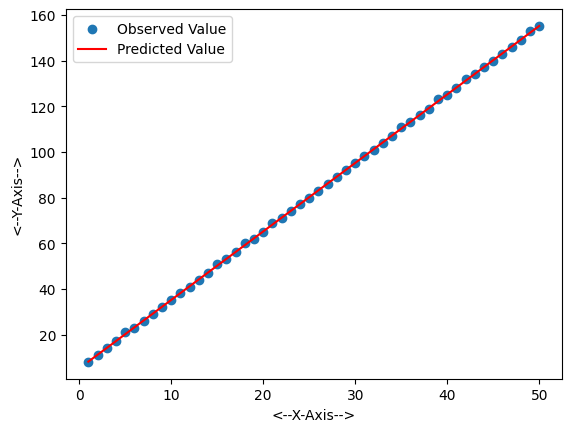

In [9]:
# Let’s plot the observed value and predicted value using matplotlib
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Observed Value')
plt.plot(x, y_hat, label='Predicted Value', color='red')
plt.xlabel('<--X-Axis-->')
plt.ylabel('<--Y-Axis-->')
plt.legend()
plt.show()


In [11]:
import pandas as pd
data = pd.read_csv('Salary_dataset.csv')

In [12]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [14]:
x_data=data['YearsExperience']
y_data=data['Salary']

In [16]:
w1, w0 = compute_coefficients(x_data,y_data)
y_data_hat = predict(x_data,w1,w0)
print(w1,w0)

9449.962321455077 24848.203966523193


In [17]:
print(evaluate_ols(y_data,y_data_hat))

(31270951.722280953, 5592.04360876066)


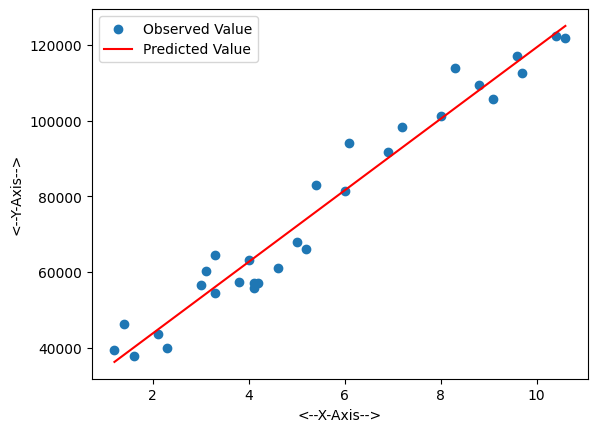

In [18]:
import matplotlib.pyplot as plt

plt.scatter(x_data, y_data, label='Observed Value')
plt.plot(x_data, y_data_hat, label='Predicted Value', color='red')
plt.xlabel('<--X-Axis-->')
plt.ylabel('<--Y-Axis-->')
plt.legend()
plt.show()
